In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demand-forecasting/test_nfaJ3J5.csv
/kaggle/input/demand-forecasting/train_0irEZ2H.csv
/kaggle/input/demand-forecasting/sample_submission_pzljTaX.csv


In [2]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("/kaggle/input/demand-forecasting/train_0irEZ2H.csv")

In [5]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [6]:
df[['day','month','year']]=df["week"].str.split('/',expand=True)

In [7]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [8]:
df=df.drop("week",axis=1)

In [9]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [10]:
# Check data info and types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   store_id         150150 non-null  int64  
 2   sku_id           150150 non-null  int64  
 3   total_price      150149 non-null  float64
 4   base_price       150150 non-null  float64
 5   is_featured_sku  150150 non-null  int64  
 6   is_display_sku   150150 non-null  int64  
 7   units_sold       150150 non-null  int64  
 8   day              150150 non-null  object 
 9   month            150150 non-null  object 
 10  year             150150 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 12.6+ MB
None


In [11]:
# Summary stats for numeric columns
print(df.describe())

           record_ID       store_id         sku_id    total_price  \
count  150150.000000  150150.000000  150150.000000  150149.000000   
mean   106271.555504    9199.422511  254761.132468     206.626751   
std     61386.037861     615.591445   85547.306447     103.308516   
min         1.000000    8023.000000  216233.000000      41.325000   
25%     53111.250000    8562.000000  217217.000000     130.387500   
50%    106226.500000    9371.000000  222087.000000     198.075000   
75%    159452.750000    9731.000000  245338.000000     233.700000   
max    212644.000000    9984.000000  679023.000000     562.162500   

          base_price  is_featured_sku  is_display_sku     units_sold  
count  150150.000000    150150.000000   150150.000000  150150.000000  
mean      219.425927         0.095611        0.133200      51.674206  
std       110.961712         0.294058        0.339792      60.207904  
min        61.275000         0.000000        0.000000       1.000000  
25%       133.237500   

In [12]:
print(df.isnull().sum())


record_ID          0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
day                0
month              0
year               0
dtype: int64


In [13]:
df = df.dropna()
print(df.isnull().sum())


record_ID          0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
day                0
month              0
year               0
dtype: int64


In [14]:
print("Total units sold:", df['units_sold'].sum())
print("Average units sold per record:", df['units_sold'].mean())
print("Max units sold in a record:", df['units_sold'].max())
print("Min units sold in a record:", df['units_sold'].min())


Total units sold: 7758881
Average units sold per record: 51.674543287001576
Max units sold in a record: 2876
Min units sold in a record: 1


In [15]:
store_sales = df.groupby('store_id')['units_sold'].sum().sort_values(ascending=False)
print(store_sales)


store_id
8023    296478
9845    261410
9823    233846
9112    218127
9613    205710
         ...  
8555     34766
8392     30968
9178     27572
9700     13154
9001      6053
Name: units_sold, Length: 76, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


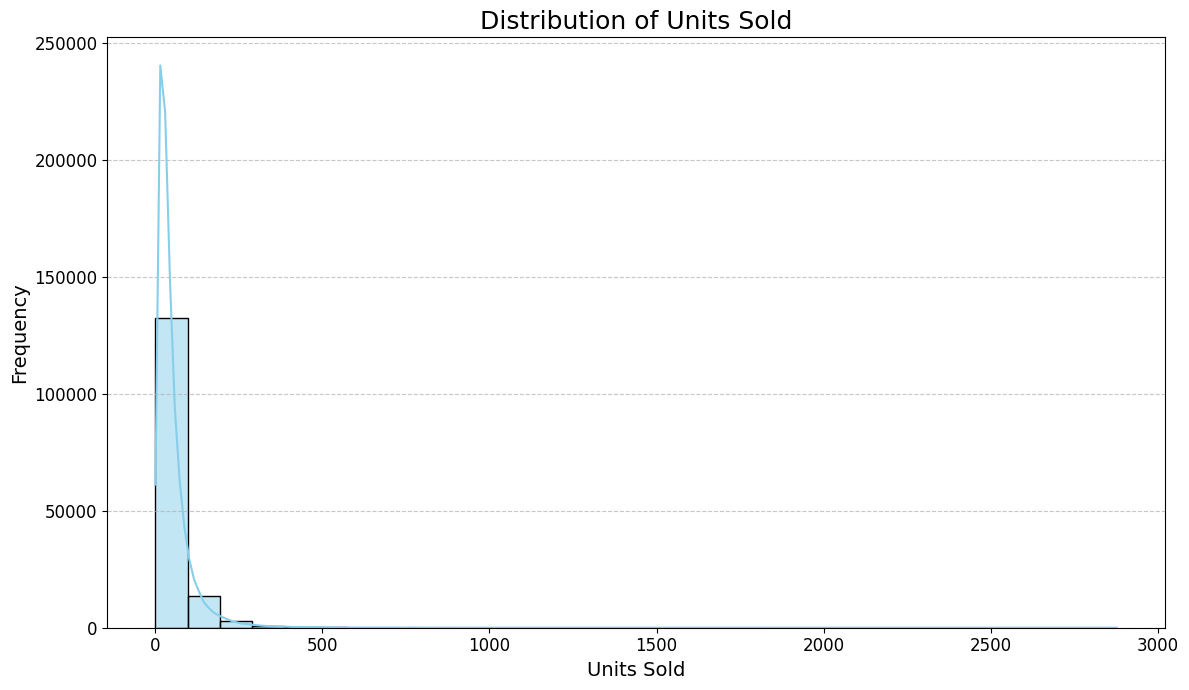

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))  # Increase the figure size (width x height)
sns.histplot(df['units_sold'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Units Sold', fontsize=18)
plt.xlabel('Units Sold', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels/titles
plt.show()


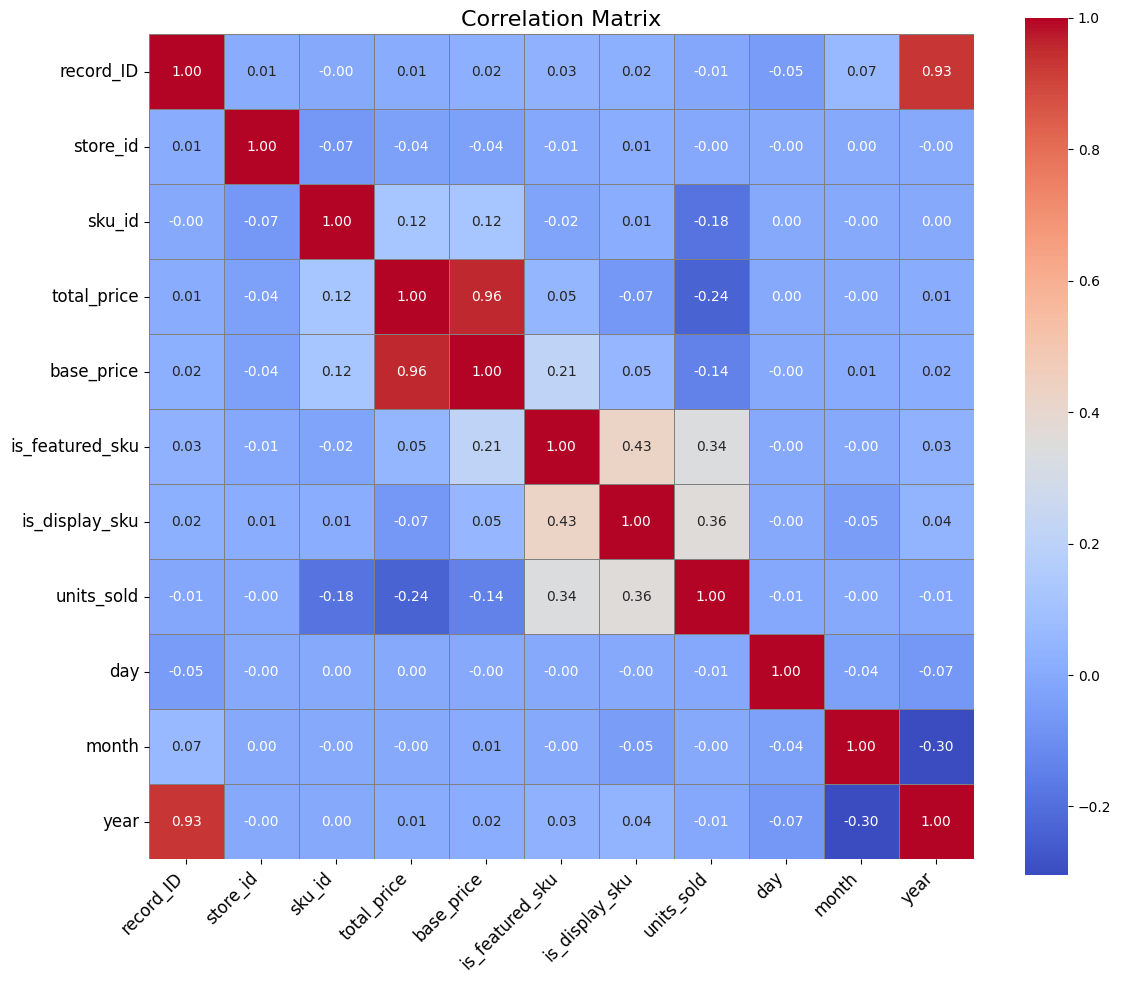

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Bigger figure
corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar=True,
    annot_kws={"size": 10}
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns='units_sold', axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)


In [19]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [20]:
model.score(X_test,y_test)

0.7683247225002038

In [21]:

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")


RMSE: 27.534


In [22]:
df.units_sold.describe()

count    150149.000000
mean         51.674543
std          60.207962
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

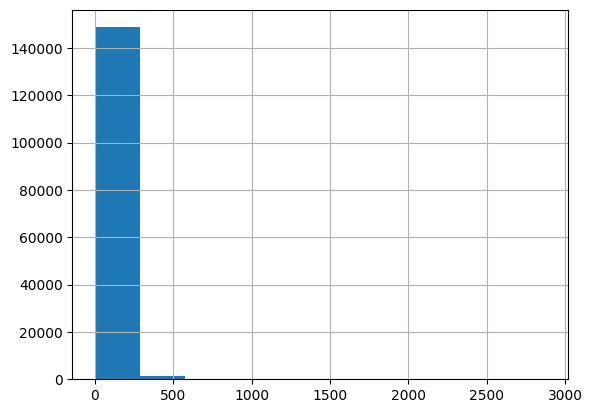

In [23]:
df.units_sold.hist()

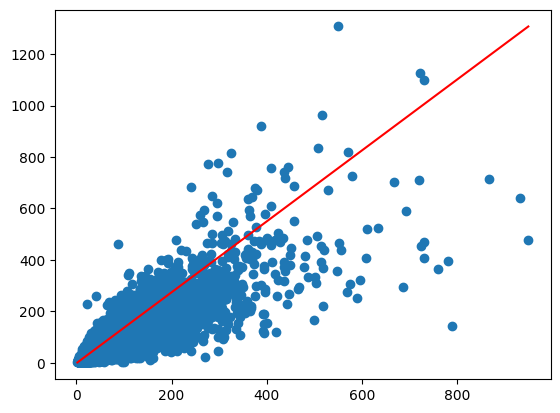

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color="red")

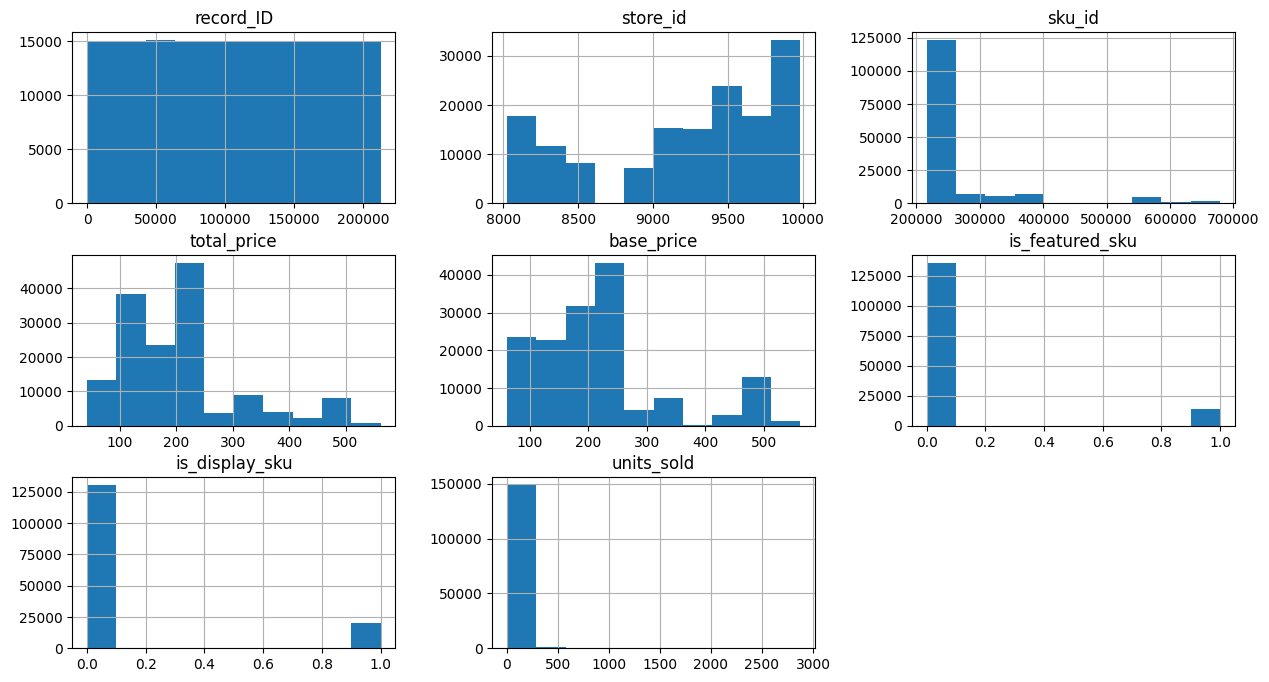

In [25]:
df.hist(figsize=(15,8))
plt.show()

In [26]:
df=df.drop("record_ID",axis=1)

In [27]:
len(df.store_id.unique())

76

In [28]:
len(df.sku_id.unique())

28

In [29]:
df.units_sold.describe()

count    150149.000000
mean         51.674543
std          60.207962
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [30]:
df.units_sold.quantile(0.99)

283.0

In [31]:
df=df[df.units_sold<df.units_sold.quantile(0.99)]

<Axes: >

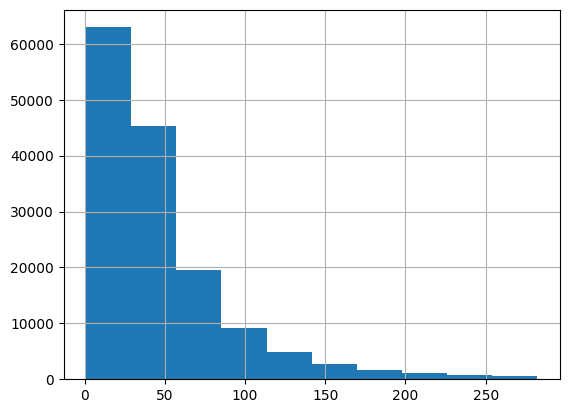

In [32]:
df.units_sold.hist()

In [33]:
df=df.join(pd.get_dummies(df.store_id,prefix="store")).drop("store_id",axis=1)
df=df.join(pd.get_dummies(df.sku_id,prefix="item")).drop("sku_id",axis=1)

In [34]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [35]:
model=RandomForestRegressor(n_jobs=-1)

X = df.drop(columns='units_sold', axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)



In [36]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [37]:
model.score(X_test,y_test)

0.8270926658732662

In [38]:

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")


RMSE: 17.776


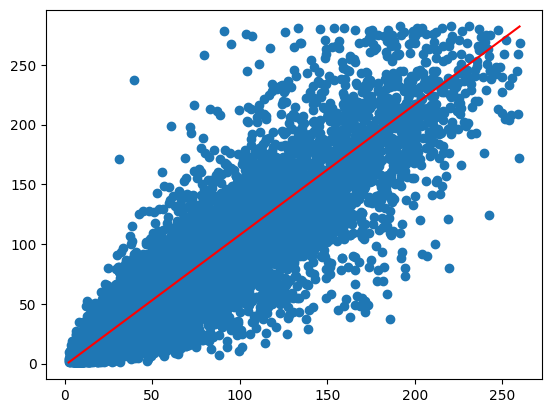

In [39]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color="red")

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[10,20],
    "min_samples_split":[2,3]

}

model=RandomForestRegressor(n_jobs=-1)

grid_search=GridSearchCV(model,param_grid,verbose=2,cv=3)

In [41]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   5.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   5.3s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   6.0s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   9.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   9.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  10.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   5.2s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   5.2s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   5.2s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   9.7s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  10.7s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [42]:
best_model=grid_search.best_estimator_

In [43]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [44]:
best_model.score(X_test,y_test)

0.8203502145890683

In [45]:
# models = {
#     'LR': LinearRegression(),
#     'DT': DecisionTreeRegressor(),
#     'FR': RandomForestRegressor(),
#     'XGB': XGBRegressor(eta=0.6, eval_metric="rmse"),
#     'GBR': GradientBoostingRegressor(learning_rate=0.001),
# }
# rmse_scores = dict()

In [46]:
# for model in models.items():
#     model[1].fit(X_train ,y_train)
#     y_pred = model[1].predict(X_val) 
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#     rmse_scores[model[0]] = round(rmse, 2)